##### Usage example of LogGabor.LogGaborFit(   )

In [1]:
import pickle
from LogGabor import LogGabor
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rand
import matplotlib

lg = LogGabor('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')

##### Loading a dictionary 

M = {100, 200, 400, 800, 1000}

In [2]:
M = 1000
with open('database/dictionary_examples/SHL_homeo_M_{}_dico.pkl'.format(M), 'rb') as fp:
    dico = pickle.load(fp)
dictx = dico.dictionary
print('(M, N) =', dictx.shape)

(M, N) = (1000, 1024)


##### Fitting dictionary with LogGabor Patches

In [3]:
i = 0
N_X, N_Y = int(np.sqrt(dictx.shape[1])), int(np.sqrt(dictx.shape[1]))
dict_ = np.reshape(dictx[i, :], (N_X, N_Y))
dictx_fit = np.zeros_like(dictx)
dictx_fit_param = np.zeros((dictx_fit.shape[0], 7))
#print(dict_)
#print(dictx_fit[i, :].shape, dictx_fit_param[i, :].shape, lg.LogGaborFit(dict_))
patch_fit, out_params = lg.LogGaborFit(dict_)

lg.LG_instance(**out_params)

array([[ -9.38570741e-06,   9.47170532e-06,   8.22873765e-08, ...,
         -4.58283303e-06,   8.36325932e-06,  -1.62775468e-06],
       [  2.36393330e-06,  -8.77784741e-06,   5.05091922e-06, ...,
          5.27927460e-07,  -9.13751014e-06,   8.32775646e-06],
       [  4.76684502e-06,   3.19097320e-06,  -5.08741485e-06, ...,
          6.02248879e-06,   4.05096772e-06,  -1.00253735e-05],
       ..., 
       [  7.69616522e-07,   1.02851727e-05,  -9.43500856e-06, ...,
         -3.04169973e-06,   5.41809007e-06,  -6.88042917e-06],
       [ -7.33941629e-06,  -4.38368758e-06,   1.15087890e-05, ...,
         -1.82486723e-06,  -1.66365275e-06,   8.00683496e-06],
       [  1.08405477e-05,  -3.46292244e-06,  -7.77745645e-06, ...,
          5.13270352e-06,  -4.05048608e-06,  -4.62917990e-06]])

In [4]:
p = out_params['theta']

In [5]:
p.value

-0.52158290089629511

In [6]:
[out_params[key].value for key in list(out_params)]

[24.0,
 18.0,
 -0.52158290089629511,
 0.28505425124458628,
 0.10463588006257246,
 0.40188008203233372,
 0.19286778547720373]

In [7]:
lg.LG_instance(**out_params).shape

(48, 48)

In [8]:

pp = lg.LG_instance(**out_params)[np.arange(N_X // 4, N_X + N_X // 4), :]
pp = pp[:, np.arange(N_Y // 4, N_Y + N_Y // 4)]
pp.shape


(32, 32)

In [9]:

dictx_fit, dictx_fit_param, idx_unfitted, names = lg.LogGaborFit_dictionary(dictx, 
                                                                            verbose=True, get_unfitted=True, 
                                                                            whoswho=True)


Fitting patch   1 /   1000
Fitting patch   2 /   1000
Fitting patch   3 /   1000
Fitting patch   4 /   1000
Fitting patch   5 /   1000
Fitting patch   6 /   1000
Fitting patch   7 /   1000
Fitting patch   8 /   1000
Fitting patch   9 /   1000
Fitting patch  10 /   1000
Fitting patch  11 /   1000
Fitting patch  12 /   1000
Fitting patch  13 /   1000
Fitting patch  14 /   1000
Fitting patch  15 /   1000
Fitting patch  16 /   1000
Fitting patch  17 /   1000
Fitting patch  18 /   1000
Parameters([('x_pos', <Parameter 'x_pos', value=12.344488294752457 +/- 0, bounds=[8:24]>), ('y_pos', <Parameter 'y_pos', value=10.0 +/- 0, bounds=[8:24]>), ('theta', <Parameter 'theta', value=-0.63955250047782974 +/- 0, bounds=[-1.5707963267948966:1.5707963267948966]>), ('sf_0', <Parameter 'sf_0', value=0.26748625556365579 +/- 0, bounds=[1e-05:inf]>), ('phase', <Parameter 'phase', value=1.4776443488010349 +/- 0, bounds=[0:6.283185307179586]>), ('B_theta', <Parameter 'B_theta', value=0.2022273886175906 +/- 0, 

Fitting patch  65 /   1000
Fitting patch  66 /   1000
Fitting patch  67 /   1000
Fitting patch  68 /   1000
Fitting patch  69 /   1000
Fitting patch  70 /   1000
Fitting patch  71 /   1000
Fitting patch  72 /   1000
Fitting patch  73 /   1000
Fitting patch  74 /   1000
Fitting patch  75 /   1000
Fitting patch  76 /   1000
Fitting patch  77 /   1000
Fitting patch  78 /   1000
Fitting patch  79 /   1000
Fitting patch  80 /   1000
Fitting patch  81 /   1000
Fitting patch  82 /   1000
Fitting patch  83 /   1000
Fitting patch  84 /   1000
Fitting patch  85 /   1000
Fitting patch  86 /   1000
Parameters([('x_pos', <Parameter 'x_pos', value=14.058216193667525 +/- 0, bounds=[8:24]>), ('y_pos', <Parameter 'y_pos', value=11.0 +/- 0, bounds=[8:24]>), ('theta', <Parameter 'theta', value=0.20154343382252971 +/- 0, bounds=[-1.5707963267948966:1.5707963267948966]>), ('sf_0', <Parameter 'sf_0', value=0.27397815174589757 +/- 0, bounds=[1e-05:inf]>), ('phase', <Parameter 'phase', value=0.000572588801816

Fitting patch  153 /   1000
Fitting patch  154 /   1000
Parameters([('x_pos', <Parameter 'x_pos', value=14.969841203473411 +/- 0, bounds=[8:24]>), ('y_pos', <Parameter 'y_pos', value=24.0 +/- 0, bounds=[8:24]>), ('theta', <Parameter 'theta', value=0.52461742828900304 +/- 0, bounds=[-1.5707963267948966:1.5707963267948966]>), ('sf_0', <Parameter 'sf_0', value=0.28692269833216388 +/- 0, bounds=[1e-05:inf]>), ('phase', <Parameter 'phase', value=2.0566910254034863 +/- 0, bounds=[0:6.283185307179586]>), ('B_theta', <Parameter 'B_theta', value=0.39753697984270919 +/- 0, bounds=[1e-05:inf]>), ('B_sf', <Parameter 'B_sf', value=0.17413904311331352 +/- 0, bounds=[1e-05:inf]>)])
Couldn't fit patch number  153
Fitting patch  155 /   1000
Fitting patch  156 /   1000
Fitting patch  157 /   1000
Fitting patch  158 /   1000
Fitting patch  159 /   1000
Fitting patch  160 /   1000
Fitting patch  161 /   1000
Fitting patch  162 /   1000
Fitting patch  163 /   1000
Parameters([('x_pos', <Parameter 'x_pos',

Fitting patch  262 /   1000
Fitting patch  263 /   1000
Fitting patch  264 /   1000
Fitting patch  265 /   1000
Fitting patch  266 /   1000
Fitting patch  267 /   1000
Fitting patch  268 /   1000
Fitting patch  269 /   1000
Parameters([('x_pos', <Parameter 'x_pos', value=24.0 +/- 0, bounds=[8:24]>), ('y_pos', <Parameter 'y_pos', value=24.0 +/- 0, bounds=[8:24]>), ('theta', <Parameter 'theta', value=-1.152192419339308 +/- 0, bounds=[-1.5707963267948966:1.5707963267948966]>), ('sf_0', <Parameter 'sf_0', value=0.28427968210227672 +/- 0, bounds=[1e-05:inf]>), ('phase', <Parameter 'phase', value=0.069925810161540078 +/- 0, bounds=[0:6.283185307179586]>), ('B_theta', <Parameter 'B_theta', value=0.4361514714456588 +/- 0, bounds=[1e-05:inf]>), ('B_sf', <Parameter 'B_sf', value=0.19199272708404702 +/- 0, bounds=[1e-05:inf]>)])
Couldn't fit patch number  268
Fitting patch  270 /   1000
Fitting patch  271 /   1000
Fitting patch  272 /   1000
Fitting patch  273 /   1000
Fitting patch  274 /   1000

Parameters([('x_pos', <Parameter 'x_pos', value=24.0 +/- 0, bounds=[8:24]>), ('y_pos', <Parameter 'y_pos', value=12.0 +/- 0, bounds=[8:24]>), ('theta', <Parameter 'theta', value=-0.66199043117957723 +/- 0, bounds=[-1.5707963267948966:1.5707963267948966]>), ('sf_0', <Parameter 'sf_0', value=0.32768883083026468 +/- 0, bounds=[1e-05:inf]>), ('phase', <Parameter 'phase', value=5.91057231372021 +/- 0, bounds=[0:6.283185307179586]>), ('B_theta', <Parameter 'B_theta', value=0.22626978815735244 +/- 0, bounds=[1e-05:inf]>), ('B_sf', <Parameter 'B_sf', value=0.0056970850839389575 +/- 0, bounds=[1e-05:inf]>)])
Couldn't fit patch number  360
Fitting patch  362 /   1000
Fitting patch  363 /   1000
Parameters([('x_pos', <Parameter 'x_pos', value=20.89729322831618 +/- 0, bounds=[8:24]>), ('y_pos', <Parameter 'y_pos', value=20.0 +/- 0, bounds=[8:24]>), ('theta', <Parameter 'theta', value=-0.47798203606347189 +/- 0, bounds=[-1.5707963267948966:1.5707963267948966]>), ('sf_0', <Parameter 'sf_0', value=0.

Fitting patch  412 /   1000
Fitting patch  413 /   1000
Fitting patch  414 /   1000
Fitting patch  415 /   1000
Parameters([('x_pos', <Parameter 'x_pos', value=20.95017519783751 +/- 0, bounds=[8:24]>), ('y_pos', <Parameter 'y_pos', value=16.0 +/- 0, bounds=[8:24]>), ('theta', <Parameter 'theta', value=0.064380320534820124 +/- 0, bounds=[-1.5707963267948966:1.5707963267948966]>), ('sf_0', <Parameter 'sf_0', value=0.25876982504740276 +/- 0, bounds=[1e-05:inf]>), ('phase', <Parameter 'phase', value=3.5200228893071035 +/- 0, bounds=[0:6.283185307179586]>), ('B_theta', <Parameter 'B_theta', value=0.1380694191549422 +/- 0, bounds=[1e-05:inf]>), ('B_sf', <Parameter 'B_sf', value=0.28912663982303954 +/- 0, bounds=[1e-05:inf]>)])
Couldn't fit patch number  414
Fitting patch  416 /   1000
Fitting patch  417 /   1000
Fitting patch  418 /   1000
Fitting patch  419 /   1000
Fitting patch  420 /   1000
Fitting patch  421 /   1000
Fitting patch  422 /   1000
Fitting patch  423 /   1000
Fitting patch 

Fitting patch  496 /   1000
Fitting patch  497 /   1000
Fitting patch  498 /   1000
Fitting patch  499 /   1000
Fitting patch  500 /   1000
Fitting patch  501 /   1000
Fitting patch  502 /   1000
Fitting patch  503 /   1000
Fitting patch  504 /   1000
Fitting patch  505 /   1000
Fitting patch  506 /   1000
Fitting patch  507 /   1000
Fitting patch  508 /   1000
Fitting patch  509 /   1000
Parameters([('x_pos', <Parameter 'x_pos', value=24.0 +/- 0, bounds=[8:24]>), ('y_pos', <Parameter 'y_pos', value=24.0 +/- 0, bounds=[8:24]>), ('theta', <Parameter 'theta', value=0.6036204267498757 +/- 0, bounds=[-1.5707963267948966:1.5707963267948966]>), ('sf_0', <Parameter 'sf_0', value=0.29946354645697049 +/- 0, bounds=[1e-05:inf]>), ('phase', <Parameter 'phase', value=0.086463342413685904 +/- 0, bounds=[0:6.283185307179586]>), ('B_theta', <Parameter 'B_theta', value=0.44236416689864011 +/- 0, bounds=[1e-05:inf]>), ('B_sf', <Parameter 'B_sf', value=0.13813294018123179 +/- 0, bounds=[1e-05:inf]>)])
C

Fitting patch  566 /   1000
Fitting patch  567 /   1000
Fitting patch  568 /   1000
Fitting patch  569 /   1000
Fitting patch  570 /   1000
Fitting patch  571 /   1000
Fitting patch  572 /   1000
Parameters([('x_pos', <Parameter 'x_pos', value=22.007739069928167 +/- 0, bounds=[8:24]>), ('y_pos', <Parameter 'y_pos', value=22.0 +/- 0, bounds=[8:24]>), ('theta', <Parameter 'theta', value=1.5707963267948966 +/- 0, bounds=[-1.5707963267948966:1.5707963267948966]>), ('sf_0', <Parameter 'sf_0', value=0.23555415010635794 +/- 0, bounds=[1e-05:inf]>), ('phase', <Parameter 'phase', value=0.40136525056492983 +/- 0, bounds=[0:6.283185307179586]>), ('B_theta', <Parameter 'B_theta', value=0.22532811998854296 +/- 0, bounds=[1e-05:inf]>), ('B_sf', <Parameter 'B_sf', value=0.51475271390361577 +/- 0, bounds=[1e-05:inf]>)])
Couldn't fit patch number  571
Fitting patch  573 /   1000
Fitting patch  574 /   1000
Fitting patch  575 /   1000
Fitting patch  576 /   1000
Fitting patch  577 /   1000
Fitting patch

Parameters([('x_pos', <Parameter 'x_pos', value=24.0 +/- 0, bounds=[8:24]>), ('y_pos', <Parameter 'y_pos', value=24.0 +/- 0, bounds=[8:24]>), ('theta', <Parameter 'theta', value=-0.59939772684502923 +/- 0, bounds=[-1.5707963267948966:1.5707963267948966]>), ('sf_0', <Parameter 'sf_0', value=0.160450101341156 +/- 0, bounds=[1e-05:inf]>), ('phase', <Parameter 'phase', value=0.2794784576614448 +/- 0, bounds=[0:6.283185307179586]>), ('B_theta', <Parameter 'B_theta', value=0.25553554840851145 +/- 0, bounds=[1e-05:inf]>), ('B_sf', <Parameter 'B_sf', value=0.0010199331799779499 +/- 0, bounds=[1e-05:inf]>)])
Couldn't fit patch number  662
Fitting patch  664 /   1000
Fitting patch  665 /   1000
Fitting patch  666 /   1000
Fitting patch  667 /   1000
Fitting patch  668 /   1000
Fitting patch  669 /   1000
Fitting patch  670 /   1000
Fitting patch  671 /   1000
Fitting patch  672 /   1000
Parameters([('x_pos', <Parameter 'x_pos', value=24.0 +/- 0, bounds=[8:24]>), ('y_pos', <Parameter 'y_pos', val

Fitting patch  727 /   1000
Fitting patch  728 /   1000
Parameters([('x_pos', <Parameter 'x_pos', value=24.0 +/- 0, bounds=[8:24]>), ('y_pos', <Parameter 'y_pos', value=10.0 +/- 0, bounds=[8:24]>), ('theta', <Parameter 'theta', value=1.394235819694885 +/- 0, bounds=[-1.5707963267948966:1.5707963267948966]>), ('sf_0', <Parameter 'sf_0', value=0.34367415955325298 +/- 0, bounds=[1e-05:inf]>), ('phase', <Parameter 'phase', value=1.645451647022502 +/- 0, bounds=[0:6.283185307179586]>), ('B_theta', <Parameter 'B_theta', value=3.8620274969469919 +/- 0, bounds=[1e-05:inf]>), ('B_sf', <Parameter 'B_sf', value=0.00038822075544964196 +/- 0, bounds=[1e-05:inf]>)])
Couldn't fit patch number  727
Fitting patch  729 /   1000
Fitting patch  730 /   1000
Fitting patch  731 /   1000
Fitting patch  732 /   1000
Fitting patch  733 /   1000
Fitting patch  734 /   1000
Fitting patch  735 /   1000
Parameters([('x_pos', <Parameter 'x_pos', value=24.0 +/- 0, bounds=[8:24]>), ('y_pos', <Parameter 'y_pos', value

Parameters([('x_pos', <Parameter 'x_pos', value=16.82437447350096 +/- 0, bounds=[8:24]>), ('y_pos', <Parameter 'y_pos', value=23.0 +/- 0, bounds=[8:24]>), ('theta', <Parameter 'theta', value=1.481553200363674 +/- 0, bounds=[-1.5707963267948966:1.5707963267948966]>), ('sf_0', <Parameter 'sf_0', value=0.33933285266884539 +/- 0, bounds=[1e-05:inf]>), ('phase', <Parameter 'phase', value=5.5902358720742358 +/- 0, bounds=[0:6.283185307179586]>), ('B_theta', <Parameter 'B_theta', value=0.16837262680530152 +/- 0, bounds=[1e-05:inf]>), ('B_sf', <Parameter 'B_sf', value=0.015724382119613911 +/- 0, bounds=[1e-05:inf]>)])
Couldn't fit patch number  820
Fitting patch  822 /   1000
Fitting patch  823 /   1000
Fitting patch  824 /   1000
Fitting patch  825 /   1000
Fitting patch  826 /   1000
Fitting patch  827 /   1000
Fitting patch  828 /   1000
Fitting patch  829 /   1000
Fitting patch  830 /   1000
Fitting patch  831 /   1000
Fitting patch  832 /   1000
Fitting patch  833 /   1000
Fitting patch  

Fitting patch  888 /   1000
Parameters([('x_pos', <Parameter 'x_pos', value=23.286481013361339 +/- 0, bounds=[8:24]>), ('y_pos', <Parameter 'y_pos', value=24.0 +/- 0, bounds=[8:24]>), ('theta', <Parameter 'theta', value=1.5707963267948966 +/- 0, bounds=[-1.5707963267948966:1.5707963267948966]>), ('sf_0', <Parameter 'sf_0', value=0.19170439950989737 +/- 0, bounds=[1e-05:inf]>), ('phase', <Parameter 'phase', value=0.31061530165123996 +/- 0, bounds=[0:6.283185307179586]>), ('B_theta', <Parameter 'B_theta', value=0.23591111948862131 +/- 0, bounds=[1e-05:inf]>), ('B_sf', <Parameter 'B_sf', value=0.025959668954388726 +/- 0, bounds=[1e-05:inf]>)])
Couldn't fit patch number  887
Fitting patch  889 /   1000
Fitting patch  890 /   1000
Fitting patch  891 /   1000
Fitting patch  892 /   1000
Fitting patch  893 /   1000
Parameters([('x_pos', <Parameter 'x_pos', value=22.995937964848011 +/- 0, bounds=[8:24]>), ('y_pos', <Parameter 'y_pos', value=9.0 +/- 0, bounds=[8:24]>), ('theta', <Parameter 'the

Fitting patch  947 /   1000
Fitting patch  948 /   1000
Fitting patch  949 /   1000
Fitting patch  950 /   1000
Fitting patch  951 /   1000
Fitting patch  952 /   1000
Parameters([('x_pos', <Parameter 'x_pos', value=24.0 +/- 0, bounds=[8:24]>), ('y_pos', <Parameter 'y_pos', value=24.0 +/- 0, bounds=[8:24]>), ('theta', <Parameter 'theta', value=-0.53821682462275877 +/- 0, bounds=[-1.5707963267948966:1.5707963267948966]>), ('sf_0', <Parameter 'sf_0', value=0.29038314601607829 +/- 0, bounds=[1e-05:inf]>), ('phase', <Parameter 'phase', value=1.9790467021326907 +/- 0, bounds=[0:6.283185307179586]>), ('B_theta', <Parameter 'B_theta', value=0.50898925964901742 +/- 0, bounds=[1e-05:inf]>), ('B_sf', <Parameter 'B_sf', value=0.16214181800680649 +/- 0, bounds=[1e-05:inf]>)])
Couldn't fit patch number  951
Fitting patch  953 /   1000
Fitting patch  954 /   1000
Fitting patch  955 /   1000
Fitting patch  956 /   1000
Fitting patch  957 /   1000
Parameters([('x_pos', <Parameter 'x_pos', value=13.127

In [10]:
idx_unfitted

[17,
 23,
 27,
 29,
 33,
 37,
 44,
 47,
 52,
 54,
 85,
 87,
 117,
 118,
 131,
 132,
 137,
 148,
 149,
 153,
 162,
 181,
 187,
 194,
 223,
 238,
 241,
 258,
 268,
 273,
 275,
 282,
 316,
 327,
 350,
 351,
 359,
 360,
 362,
 364,
 369,
 370,
 372,
 376,
 386,
 393,
 405,
 408,
 414,
 428,
 430,
 450,
 453,
 459,
 462,
 465,
 486,
 493,
 508,
 511,
 514,
 516,
 524,
 526,
 536,
 550,
 551,
 562,
 571,
 583,
 584,
 594,
 599,
 610,
 619,
 645,
 662,
 671,
 681,
 690,
 693,
 699,
 700,
 709,
 715,
 718,
 727,
 734,
 761,
 773,
 783,
 799,
 803,
 808,
 819,
 820,
 846,
 849,
 856,
 868,
 871,
 873,
 877,
 884,
 885,
 887,
 892,
 895,
 906,
 909,
 913,
 918,
 921,
 932,
 937,
 944,
 951,
 956,
 962,
 966,
 968]

'whoswho = True' to get the names of the LogGabor parameters

In [11]:
names

['dictx_fit_param[:,0] = x0',
 'dictx_fit_param[:,1] = y0',
 'dictx_fit_param[:,2] = theta',
 'dictx_fit_param[:,3] = sf_0',
 'dictx_fit_param[:,4] = Phase',
 'dictx_fit_param[:,5] = B_sf',
 'dictx_fit_param[:,6] = B_theta']

##### Results example

Showing 10 dictionary patches picked at random with corresponding fits

In [12]:
dictx.shape

(1000, 1024)

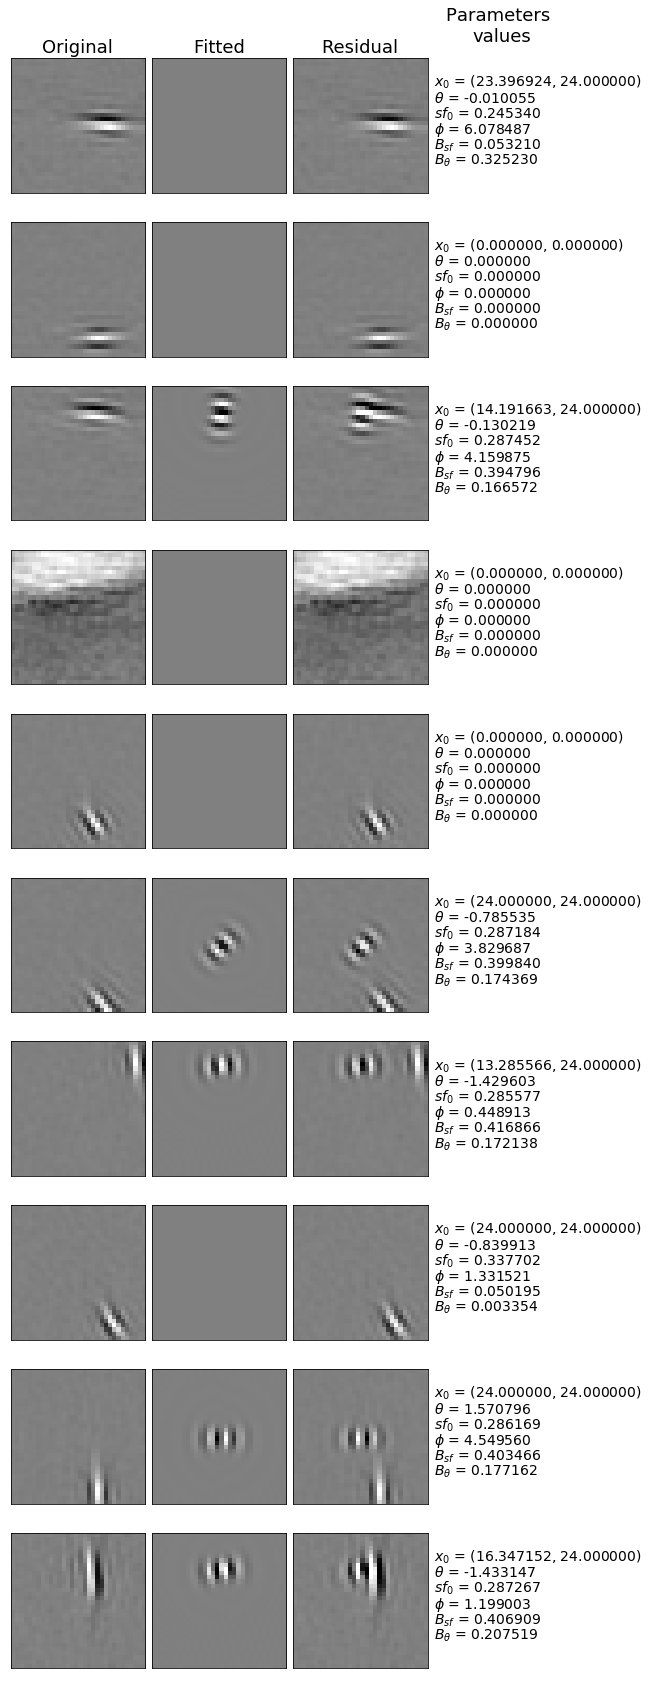

In [13]:
subplotpars = matplotlib.figure.SubplotParams(wspace=0.05, hspace=0.05)

nrows=10
ncols=4

fig, ax = plt.subplots(nrows, ncols, figsize=(10, 30), subplotpars=subplotpars) 

idx = rand.permutation(dictx.shape[0])
idx = idx[:nrows]

for k in range(nrows):
        
    patch_original = np.reshape(dictx[idx[k],:],(32,32))
    cmax = np.max(np.abs(patch_original))
    patch_fitted = np.reshape(dictx_fit[idx[k],:],(32,32))
    residual = patch_original - patch_fitted
    
    opts = dict(cmap='gray', vmin=-cmax, vmax=+cmax)
    opts2= dict(fontsize=14)
    
    i=0
    ax[k,i].imshow(patch_original, **opts)
    ax[k,i].xaxis.set_visible(False)
    ax[k,i].yaxis.set_visible(False)
    if k==0:
        ax[k,i].set_title('Original', fontsize=18)
    
    i=1
    ax[k,i].imshow(patch_fitted, **opts)
    ax[k,i].xaxis.set_visible(False)
    ax[k,i].yaxis.set_visible(False)
    if k==0:
        ax[k,i].set_title('Fitted', fontsize=18)
    
    i=2
    ax[k,i].imshow(residual, **opts)
    ax[k,i].xaxis.set_visible(False)
    ax[k,i].yaxis.set_visible(False)
    if k==0:
        ax[k,i].set_title('Residual', fontsize=18)
        
    i=3
    ax[k,i].text(0, 0.75, r'$x_0$ = (%3f, %3f)'%(dictx_fit_param[idx[k],0],dictx_fit_param[idx[k],1]), **opts2)
    ax[k,i].text(0, 0.65, r'$\theta$ = %3f'%(dictx_fit_param[idx[k],2]), **opts2)
    ax[k,i].text(0, 0.55, r'$sf_0$ = %3f'%(dictx_fit_param[idx[k],3]), **opts2)
    ax[k,i].text(0, 0.45, r'$\phi$ = %3f'%(dictx_fit_param[idx[k],4]), **opts2)
    ax[k,i].text(0, 0.35, r'$B_{sf}$ = %3f'%(dictx_fit_param[idx[k],5]), **opts2)
    ax[k,i].text(0, 0.25, r'$B_\theta$ = %3f'%(dictx_fit_param[idx[k],6]), **opts2)
    ax[k,i].xaxis.set_visible(False)
    ax[k,i].yaxis.set_visible(False)
    ax[k,i].spines["top"].set_visible(False)
    ax[k,i].spines["left"].set_visible(False)
    ax[k,i].spines["right"].set_visible(False)
    ax[k,i].spines["bottom"].set_visible(False)
    if k==0:
        ax[k,i].set_title('Parameters \nvalues', fontsize=18)
        
   
#plt.show(fig)